HW1

In [2]:
import pandas as pd
import ast

In [3]:
def process_bibliographic_data(file_path, output_csv_path):
    
    with open(file_path, "r", encoding="utf-8") as file:
        data = file.read()
    
    records = []
    texts = data.strip().split("\n\n")

    for text in texts:
        lines = text.split("\n")
        record = {
            "Title": None,
            "Authors": None,
            "Year": None,
            "Place": None,
            "Index": None,
            "References": [],
            "Abstract": None
        }
        for line in lines:
            if line.startswith("#*"):
                record["Title"] = line[2:].strip()
            elif line.startswith("#@"):
                record["Authors"] = line[2:].strip()
            elif line.startswith("#t"):
                record["Year"] = int(line[2:].strip())
            elif line.startswith("#c"):
                record["Place"] = line[2:].strip()
            elif line.startswith("#index"):
                record["Index"] = int(line[6:].strip())
            elif line.startswith("#%"):
                record["References"].append(int(line[2:].strip()))
            elif line.startswith("#!"):
                record["Abstract"] = line[2:].strip()
        records.append(record)

    df = pd.DataFrame(records)
    df.to_csv(output_csv_path, index=False, encoding='utf-8')

    return df

input_file_path = "/Users/hunjunsin/Desktop/Jun/Unsupervised/hw1/acm.txt"  
output_csv_path = "hw1_data.csv"  

processed_df = process_bibliographic_data(input_file_path, output_csv_path)

In [3]:
df = pd.read_csv("/Users/hunjunsin/Desktop/Jun/Unsupervised/hw1/hw1_data.csv")
df.head(10)

,Title,Authors,Year,Place,Index,References,Abstract
0,MOSFET table look-up models for circuit simula...,NaN,1984.0,"Integration, the VLSI Journal",1,[],NaN
1,The verification of the protection mechanisms ...,Virgil D. Gligor,1984.0,International Journal of Parallel Programming,2,[],NaN
2,Another view of functional and multivalued dep...,"M. Gyssens, J. Paredaens",1984.0,International Journal of Parallel Programming,3,[],NaN
3,Entity-relationship diagrams which are in BCNF,"Sushil Jajodia, Peter A. Ng, Frederick N. Spri...",1984.0,International Journal of Parallel Programming,4,[],NaN
4,The computer comes of age,Rene Moreau,1984.0,The computer comes of age,5,[],NaN
5,Computationally efficient algorithms for a one...,"A. G. Akritas, S. S. Lyengar, A. A. Rampuria",1984.0,International Journal of Parallel Programming,6,[],NaN
6,The hierarchical ordering in Multiattribute files,"C. C. Chang, M. W. Du, R. C. T. Lee",1983.0,Information Sciences: an International Journal,7,[],NaN
7,Insertion languages,David Haussler,1983.0,Information Sciences: an International Journal,8,[],NaN
8,The Three-Machine No-Wait Flow Shop is NP-Comp...,Hans Röck,1984.0,Journal of the ACM (JACM),9,"[289258, 2135000]",NaN
9,Lower Bounds and Fast Algorithms for Sequence ...,George M. Trojan,1984.0,Journal of the ACM (JACM),10,[2135000],NaN


A. Compute the number of distinct authors, publication venues, publications, and citations/references

In [ ]:
def compute_distinct_counts(csv_path):

    df = pd.read_csv(csv_path)

    authors_set = set()
    for authors in df['Authors'].dropna():  
        authors_set.update([author.strip().lower() for author in authors.split(",")])

    venues_set = set(df['Source'].dropna()) 

    publications_set = set(df['Index'])  

    references_set = set()
    for references in df['References'].dropna():
        if isinstance(references, str):
            references_list = ast.literal_eval(references)  
            references_set.update(references_list)

    result = {
        "Distinct Authors": len(authors_set),
        "Distinct Venues": len(venues_set),
        "Distinct Publications": len(publications_set),
        "Distinct References": len(references_set)
    }

    return result

csv_path = "/Users/hunjunsin/Desktop/Jun/Unsupervised/hw1_data.csv"  
distinct_counts = compute_distinct_counts(csv_path)

for key, value in distinct_counts.items():
    print(f"{key}: {value}")

Distinct Authors: 1628295
Distinct Venues: 273328
Distinct Publications: 2385057
Distinct References: 1007495


B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?

Answer: There are venues that are essentially the same but are represented in different ways, which causes them to be counted separately. I think text normalization would be necessary to reduce such cases and ensure consistency.

In [6]:
def check_venue_names(keyword):
 
    matching_venues = df[df['Source'].str.contains(keyword, na=False, case=False)]

    return matching_venues

keyword = "Principles and Practice of Knowledge Discovery in Databases"  

matching_venues = check_venue_names(keyword)

print("Matching Venues:")
print(matching_venues['Source'].unique())
print(f"Number of Publications with '{keyword}': {len(matching_venues)}")
print(f"Number of Unique Values: {len(matching_venues['Source'].unique())}")

Matching Venues:
["PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases"
 'Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)'
 'Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)'
 'PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases'
 "PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases"]
Number of Publications with 'Principles and Practice of Knowledge Discovery in Databases': 212
Number of Unique Values: 5


C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

There are some nonsense value which is than 9000, 5000

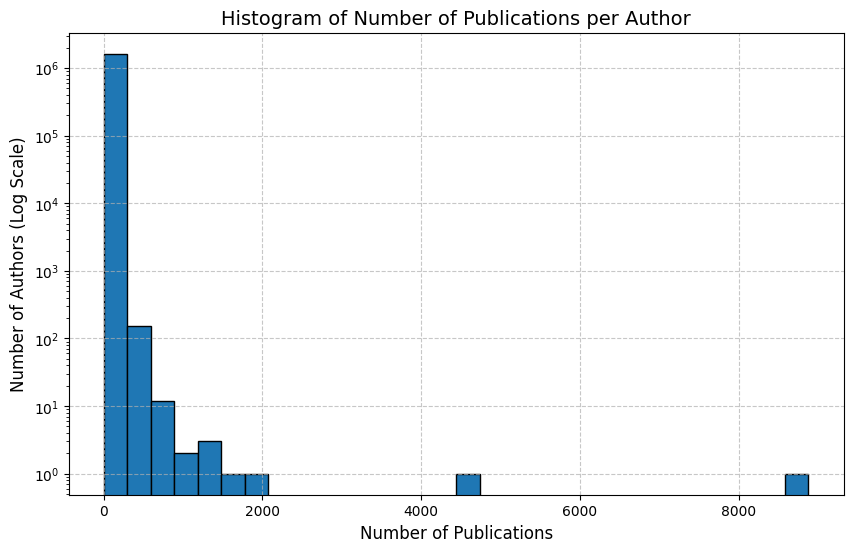

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

def construct_author_publications():

    author_publications = defaultdict(list)

    for _, row in df.iterrows():
        if pd.notna(row['Authors']) and pd.notna(row['Title']):
            authors = [author.strip().lower() for author in row['Authors'].split(",")]
            for author in authors:
                author_publications[author].append(row['Title'].strip().lower())

    return author_publications

def plot_publications_histogram(author_publications):
    
    num_publications = [len(pubs) for pubs in author_publications.values()]

    plt.figure(figsize=(10, 6))
    plt.hist(num_publications, bins=30, log=True, edgecolor='black')
    plt.title("Histogram of Number of Publications per Author", fontsize=14)
    plt.xlabel("Number of Publications", fontsize=12)
    plt.ylabel("Number of Authors (Log Scale)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

author_publications = construct_author_publications()

plot_publications_histogram(author_publications)

We could find that the author name who publish the books more than 1000 is not valid, jr, -

In [16]:
num_publications = [(key,len(pubs)) for key, pubs in author_publications.items()]

for key, num in num_publications:
    if num > 1000:
        print(key)


jr.
iii
wei wang
computer staff
staff
linux journal staff
-


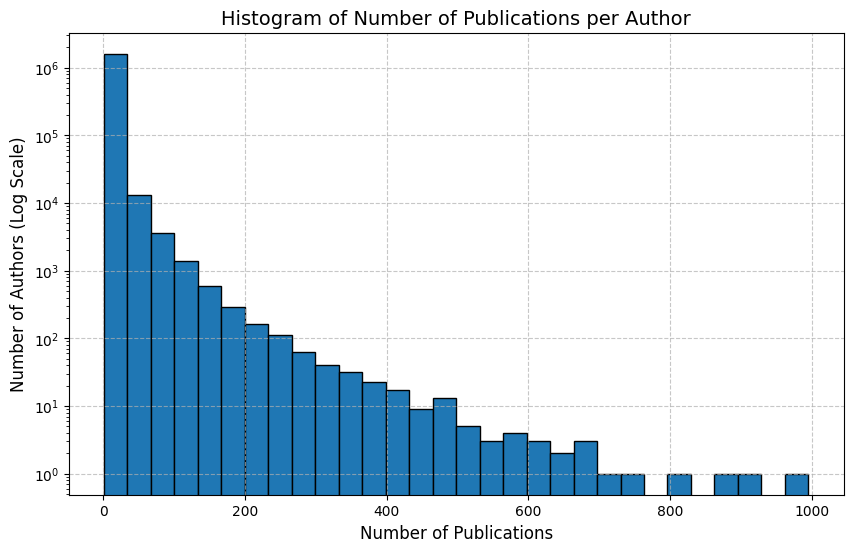

In [21]:
filtered_author_publications = defaultdict()
for key, pubs in author_publications.items():
    if len(pubs) < 1000:
        filtered_author_publications[key] = pubs
        

plot_publications_histogram(filtered_author_publications)
        

D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.


In [11]:
import pandas as pd
import numpy as np
from collections import defaultdict

def calculate_statistics(author_publications):

    num_publications = [len(pubs) for pubs in author_publications.values()]
    
    mean_value = np.mean(num_publications)
    std_value = np.std(num_publications)
    q1 = np.percentile(num_publications, 25)  
    q2 = np.percentile(num_publications, 50)  
    q3 = np.percentile(num_publications, 75)  

    return {
        "Mean": mean_value,
        "Standard Deviation": std_value,
        "Q1 (1st Quartile)": q1,
        "Q2 (Median)": q2,
        "Q3 (3rd Quartile)": q3,
    }

def compare_statistics(stats):

    explanation = []

    mean = stats["Mean"]
    median = stats["Q2 (Median)"]
    std = stats["Standard Deviation"]
    q1 = stats["Q1 (1st Quartile)"]
    q3 = stats["Q3 (3rd Quartile)"]

    if mean > median:
        explanation.append("The mean is greater than the median, indicating a right-skewed distribution.")
    elif mean < median:
        explanation.append("The mean is less than the median, indicating a left-skewed distribution.")
    else:
        explanation.append("The mean and median are equal, indicating a symmetrical distribution.")

    explanation.append(
        f"The standard deviation is {std:.2f}, which indicates the variability in the number of publications per author."
    )
    explanation.append(
        f"The interquartile range (Q3 - Q1) is {q3 - q1:.2f}, showing the range of the middle 50% of authors."
    )

    return "\n".join(explanation)

csv_path = "/Users/hunjunsin/Desktop/Jun/Unsupervised/hw1_data.csv"  

author_publications = construct_author_publications(csv_path)
stats = calculate_statistics(author_publications)

print("Statistics:")
for key, value in stats.items():
    print(f"{key}: {value:.2f}")

comparison = compare_statistics(stats)
print("\nComparison and Explanation:")
print(comparison)

Statistics:
Mean: 3.46
Standard Deviation: 12.77
Q1 (1st Quartile): 1.00
Q2 (Median): 1.00
Q3 (3rd Quartile): 3.00

Comparison and Explanation:
The mean is greater than the median, indicating a right-skewed distribution.
The standard deviation is 12.77, which indicates the variability in the number of publications per author.
The interquartile range (Q3 - Q1) is 2.00, showing the range of the middle 50% of authors.


E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?


Statistics:
Mean: 8.73
Standard Deviation: 106.80
Q1 (1st Quartile): 1.00
Median (Q2): 1.00
Q3 (3rd Quartile): 1.00
Most Frequent Venue: IEEE Transactions on Information Theory
Most Frequent Count: 12754


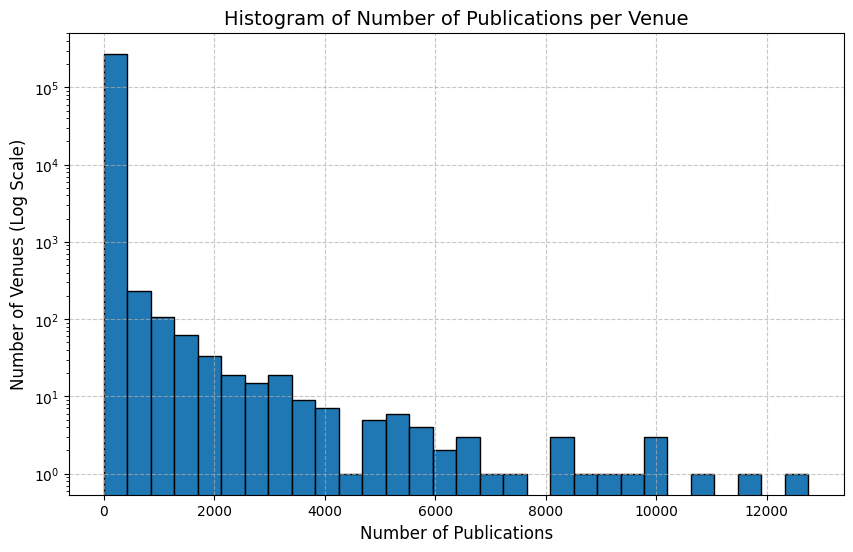

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def calculate_venue_statistics(csv_path):

    df = pd.read_csv(csv_path)

    venue_counts = Counter(df['Place'].dropna())
    publication_counts = list(venue_counts.values())
    
    mean_value = np.mean(publication_counts)
    std_value = np.std(publication_counts)
    q1 = np.percentile(publication_counts, 25) 
    median_value = np.percentile(publication_counts, 50)  
    q3 = np.percentile(publication_counts, 75)  

    venue_series = pd.Series(venue_counts)
    most_frequent_venue = venue_series.idxmax()
    most_frequent_count = venue_counts[most_frequent_venue]

    stats = {
        "Mean": mean_value,
        "Standard Deviation": std_value,
        "Q1 (1st Quartile)": q1,
        "Median (Q2)": median_value,
        "Q3 (3rd Quartile)": q3,
        "Most Frequent Venue": most_frequent_venue,
        "Most Frequent Count": most_frequent_count,
    }

    return stats, venue_counts, most_frequent_venue

def plot_venue_histogram(venue_counts):
    
    publication_counts = list(venue_counts.values())

    plt.figure(figsize=(10, 6))
    plt.hist(publication_counts, bins=30, edgecolor='black', log=True)
    plt.title("Histogram of Number of Publications per Venue", fontsize=14)
    plt.xlabel("Number of Publications", fontsize=12)
    plt.ylabel("Number of Venues (Log Scale)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

csv_path = "/Users/hunjunsin/Desktop/Jun/Unsupervised/hw1/hw1_data.csv" 

stats, venue_counts, most_frequent_venue = calculate_venue_statistics(csv_path)

print("Statistics:")
for key, value in stats.items():
    if key in ["Mean", "Standard Deviation", "Q1 (1st Quartile)", "Median (Q2)", "Q3 (3rd Quartile)"]:
        print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")

plot_venue_histogram(venue_counts)

F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

Publication with the Largest Number of References:
{'Index': 2015217, 'Title': 'Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles', 'Num_References': 809}

Publication with the Largest Number of Citations:
{'Index': 2135000, 'Title': 'INFORMS Journal on Computing', 'Num_Citations': 938039}


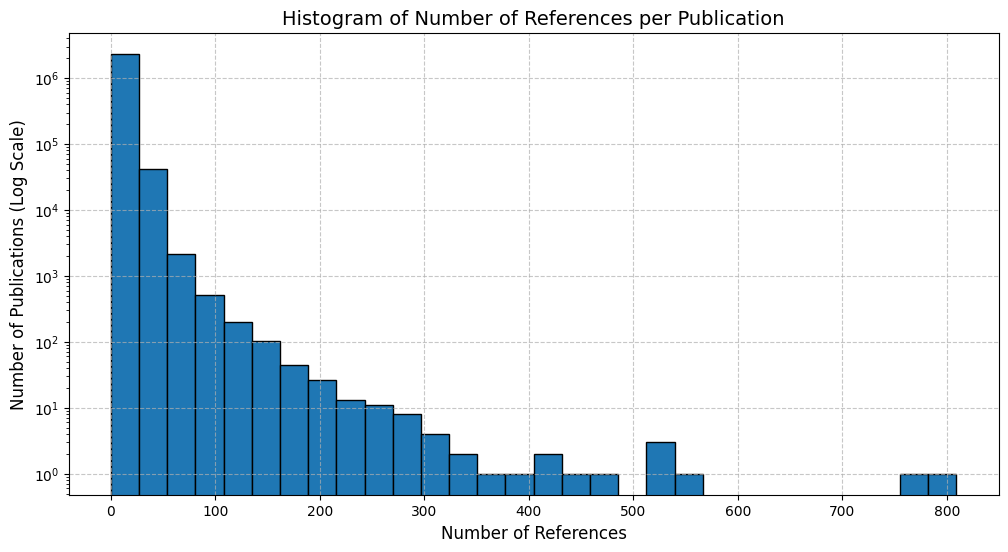

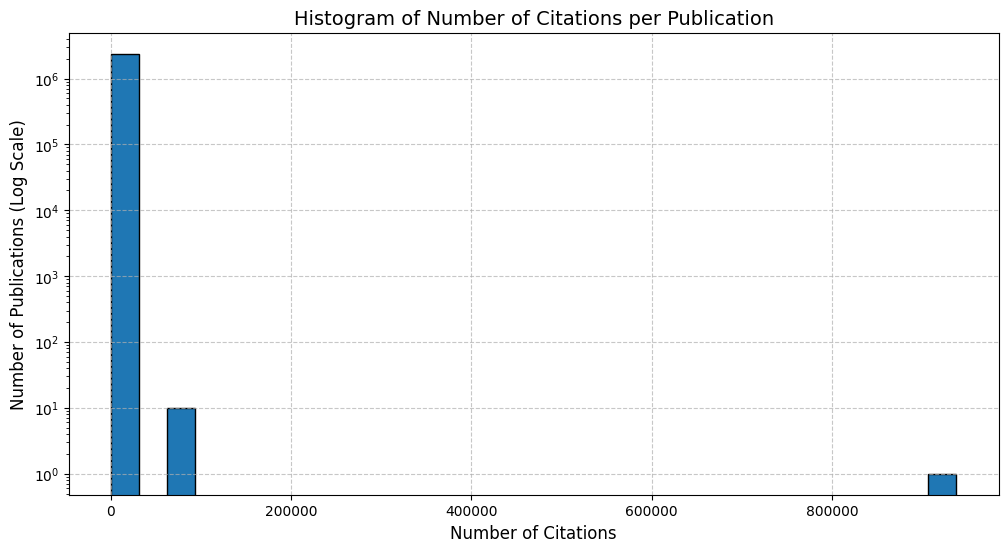

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import ast

def calculate_references_and_citations(csv_path):

    df = pd.read_csv(csv_path)

    citation_counts = defaultdict(int)
    
    for _,row in df.iterrows():
        if pd.notna(row['References']):
            references = ast.literal_eval(row['References']) if isinstance(row['References'], str) else []
            for ref in references:
                citation_counts[ref] += 1
                
    df['Num_References'] = df['References'].apply(lambda x: len(ast.literal_eval(x)) if pd.notna(x) and isinstance(x, str) else 0)
    df['Num_Citations'] = df['Index'].apply(lambda x: citation_counts.get(x, 0))

    max_references_pub = df.loc[df['Num_References'].idxmax()]
    max_citations_pub = df.loc[df['Num_Citations'].idxmax()]

    results = {
        "Max References Publication": {
            "Index": max_references_pub['Index'],
            "Title": max_references_pub['Title'],
            "Num_References": max_references_pub['Num_References']
        },
        "Max Citations Publication": {
            "Index": max_citations_pub['Index'],
            "Title": max_citations_pub['Title'],
            "Num_Citations": max_citations_pub['Num_Citations']
        }
    }

    return results, df

def plot_references_and_citations_histogram(df):

    plt.figure(figsize=(12, 6))
    plt.hist(df['Num_References'], bins=30, edgecolor='black', log=True)
    plt.title("Histogram of Number of References per Publication", fontsize=14)
    plt.xlabel("Number of References", fontsize=12)
    plt.ylabel("Number of Publications (Log Scale)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.hist(df['Num_Citations'], bins=30, edgecolor='black', log=True)
    plt.title("Histogram of Number of Citations per Publication", fontsize=14)
    plt.xlabel("Number of Citations", fontsize=12)
    plt.ylabel("Number of Publications (Log Scale)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


csv_path = "/Users/hunjunsin/Desktop/Jun/Unsupervised/hw1/hw1_data.csv"
results, df_with_refs_citations = calculate_references_and_citations(csv_path)

print("Publication with the Largest Number of References:")
print(results["Max References Publication"])
print("\nPublication with the Largest Number of Citations:")
print(results["Max Citations Publication"])

plot_references_and_citations_histogram(df_with_refs_citations)

G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

Top Venues by Impact Factor:
                                                    Venue  Impact_Factor
261547                                            ai edam        82080.0
261529                            graphics interface 1990        82080.0
269409  ijirr: international journal of information re...        82080.0
269406                                              pvldb        82080.0
261548                                               graz        82080.0


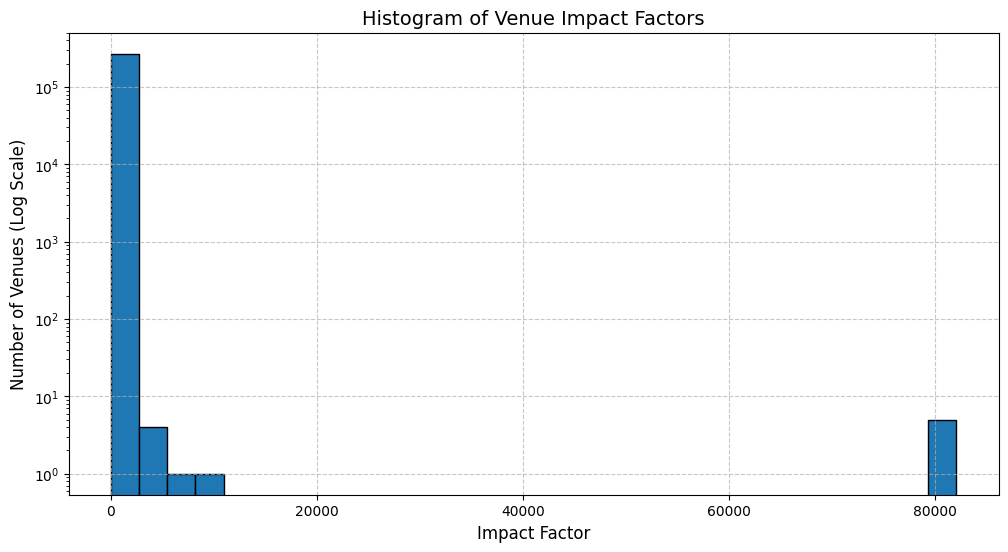

In [5]:
def calculate_impact_factors(df):

    venue_stats = defaultdict(lambda: {"total_citations": 0, "num_publications": 0})

    for _, row in df.iterrows():
        if pd.notna(row['Place']) and pd.notna(row['Num_Citations']):
            venue = row['Place'].strip().lower()
            venue_stats[venue]['total_citations'] += row['Num_Citations']
            venue_stats[venue]['num_publications'] += 1

    impact_factors = {
        venue: stats["total_citations"] / stats["num_publications"]
        for venue, stats in venue_stats.items()
        if stats["num_publications"] > 0
    }

    impact_df = pd.DataFrame(
        [{"Venue": venue, "Impact_Factor": impact} for venue, impact in impact_factors.items()]
    ).sort_values(by="Impact_Factor", ascending=False)

    return impact_factors, impact_df

def plot_impact_factor_histogram(impact_factors):

    impact_values = list(impact_factors.values())

    plt.figure(figsize=(12, 6))
    plt.hist(impact_values, bins=30, edgecolor='black', log=True)
    plt.title("Histogram of Venue Impact Factors", fontsize=14)
    plt.xlabel("Impact Factor", fontsize=12)
    plt.ylabel("Number of Venues (Log Scale)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

impact_factors, impact_df = calculate_impact_factors(df_with_refs_citations)

print("Top Venues by Impact Factor:")
print(impact_df.head())

plot_impact_factor_histogram(impact_factors)

H. What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

In [7]:
highest_impact_venue = impact_df['Venue'][impact_df["Impact_Factor"] == 82080]
print("Venue with the Highest Impact Factor:")
print(highest_impact_venue)

Venue with the Highest Impact Factor:
261547                                              ai edam
261529                              graphics interface 1990
269409    ijirr: international journal of information re...
269406                                                pvldb
261548                                                 graz
Name: Venue, dtype: object


In [6]:
for venue in ['AI EDAM', 'IJIRR', 'Graz', 'Graphics Interface 1990', 'PVLDB']:
    venue_data = df_with_refs_citations[df_with_refs_citations['Place'] == venue]
    title = venue_data['Title']
    total_citations = venue_data['Num_Citations'].sum()
    num_publications = len(venue_data)
    print(f"Venue: {venue}, Title: {title},Publications: {num_publications}, Citations: {total_citations}")

Venue: AI EDAM, Title: 2134993    An efficient diagnosis algorithm for inconsist...
Name: Title, dtype: object,Publications: 1, Citations: 82080
Venue: IJIRR, Title: Series([], Name: Title, dtype: object),Publications: 0, Citations: 0
Venue: Graz, Title: 2134994    Evaluating Design Alternatives for Feature Rec...
Name: Title, dtype: object,Publications: 1, Citations: 82080
Venue: Graphics Interface 1990, Title: 2134028    The DataPaper: living in the virtual world
Name: Title, dtype: object,Publications: 1, Citations: 82080
Venue: PVLDB, Title: 2381694    gStore: answering SPARQL queries via subgraph ...
Name: Title, dtype: object,Publications: 1, Citations: 82080


In [29]:
for venue in ['AI EDAM', 'IJIRR', 'Graz', 'Graphics Interface 1990', 'PVLDB']:
    venue_data = df_with_refs_citations[df_with_refs_citations['Source'] == venue]
    print(f"Venue: {venue}, Top Cited Paper:")
    print(venue_data.nlargest(1, 'Num_Citations')[['Title', 'Num_Citations']])

Venue: AI EDAM, Top Cited Paper:
                                                     Title  Num_Citations
2134993  An efficient diagnosis algorithm for inconsist...          82080
Venue: IJIRR, Top Cited Paper:
Empty DataFrame
Columns: [Title, Num_Citations]
Index: []
Venue: Graz, Top Cited Paper:
                                                     Title  Num_Citations
2134994  Evaluating Design Alternatives for Feature Rec...          82080
Venue: Graphics Interface 1990, Top Cited Paper:
                                              Title  Num_Citations
2134028  The DataPaper: living in the virtual world          82080
Venue: PVLDB, Top Cited Paper:
                                                     Title  Num_Citations
2381694  gStore: answering SPARQL queries via subgraph ...          82080


Top Venues by Impact Factor (Restricted to ≥10 Publications):
                                                   Venue  Impact Factor
23821  Proceedings of the 19th ACM SIGKDD internation...    2033.202970
8383                        INFORMS Journal on Computing     758.809179
4550   Proceedings of the 2001 conference on Applicat...     229.565217
10041  Computational Linguistics - Special issue on u...     205.916667
9807   SOSP '03 Proceedings of the nineteenth ACM sym...     195.636364


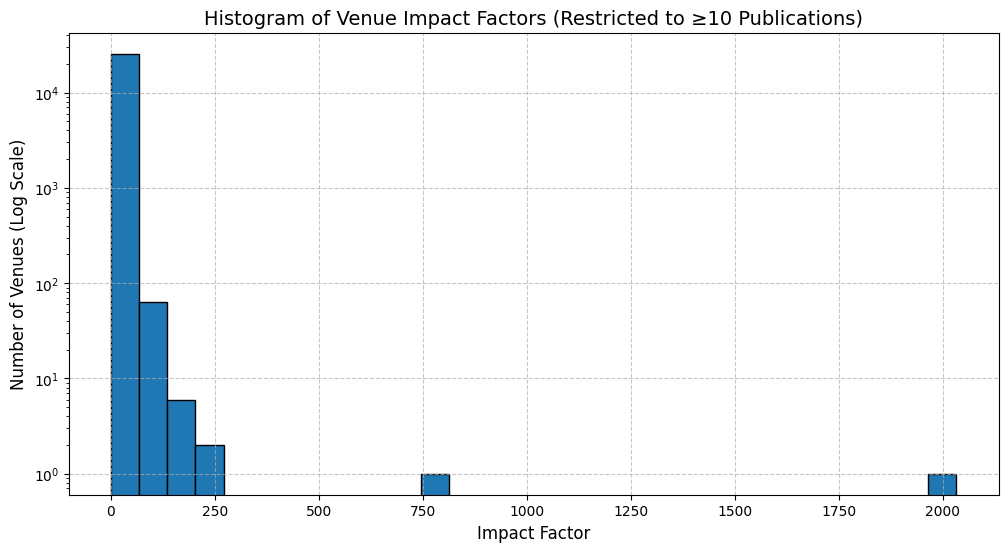

In [10]:
def calculate_impact_factors(df, min_publications=10):

    venue_stats = defaultdict(lambda: {"total_citations": 0, "num_publications": 0})

    for _, row in df.iterrows():
        if pd.notna(row['Place']) and pd.notna(row['Num_Citations']):
            venue = row['Place']
            venue_stats[venue]["total_citations"] += row['Num_Citations']
            venue_stats[venue]["num_publications"] += 1

    impact_factors = {
        venue: stats["total_citations"] / stats["num_publications"]
        for venue, stats in venue_stats.items()
        if stats["num_publications"] >= min_publications
    }

    impact_df = pd.DataFrame(
        [{"Venue": venue, "Impact Factor": impact} for venue, impact in impact_factors.items()]
    ).sort_values(by="Impact Factor", ascending=False)

    return impact_factors, impact_df

def plot_impact_factor_histogram(impact_factors):
    
    impact_values = list(impact_factors.values())

    plt.figure(figsize=(12, 6))
    plt.hist(impact_values, bins=30, edgecolor='black', log=True)
    plt.title("Histogram of Venue Impact Factors (Restricted to ≥10 Publications)", fontsize=14)
    plt.xlabel("Impact Factor", fontsize=12)
    plt.ylabel("Number of Venues (Log Scale)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

impact_factors, impact_df = calculate_impact_factors(df_with_refs_citations, min_publications=10)

print("Top Venues by Impact Factor (Restricted to ≥10 Publications):")
print(impact_df.head())

plot_impact_factor_histogram(impact_factors)

J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

      Year  Avg_References  Avg_Citations  Num_Publications
0   1936.0        0.000000       0.000000                 1
1   1938.0        0.000000       6.000000                 1
2   1941.0        0.000000       0.000000                 1
3   1945.0        0.000000      20.000000                 1
4   1947.0        0.000000       0.000000                 1
..     ...             ...            ...               ...
68  2012.0        6.004628       2.055771            138944
69  2013.0        6.443356       4.169791            110471
70  2014.0        6.402448      10.236768             92956
71  2015.0        3.469708       0.012592             26921
72  2016.0        1.357594       0.000332              3009

[73 rows x 4 columns]


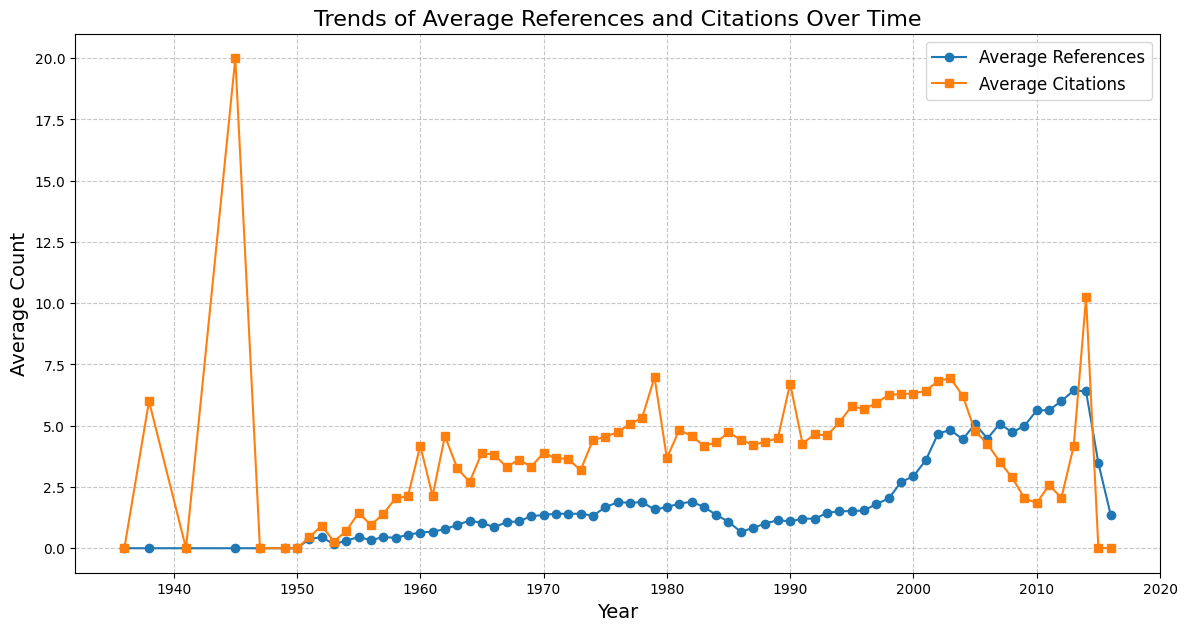

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_yearly_stats(df):

    yearly_stats = df.groupby('Year').agg(
        Avg_References=('Num_References', 'mean'),
        Avg_Citations=('Num_Citations', 'mean'),
        Num_Publications=('Year', 'count')
    ).reset_index()

    return yearly_stats

def plot_yearly_trends(yearly_stats):

    plt.figure(figsize=(14, 7))
    plt.plot(
        yearly_stats['Year'],
        yearly_stats['Avg_References'],
        label='Average References',
        marker='o'
    )

    plt.plot(
        yearly_stats['Year'],
        yearly_stats['Avg_Citations'],
        label='Average Citations',
        marker='s'
    )

    plt.title('Trends of Average References and Citations Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Count', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

yearly_stats = calculate_yearly_stats(df_with_refs_citations)

print(yearly_stats)
plot_yearly_trends(yearly_stats)

In [14]:
print(yearly_stats['Year'].unique())

[1936. 1938. 1941. 1945. 1947. 1949. 1950. 1951. 1952. 1953. 1954. 1955.
 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967.
 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979.
 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.]


The reason why the graph suddenly drop is because the data only contains the year till 2016.